1. This is a more complex and functional system to analyze the performance of Reinforcement Learning.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the whole data set
df = pd.read_csv('weatherAUS.csv')
data_collection = np.array(df)
print(data_collection)
print(len(data_collection))

[['2008-12-01' 'Albury' 13.4 ... 21.8 'No' 'No']
 ['2008-12-02' 'Albury' 7.4 ... 24.3 'No' 'No']
 ['2008-12-03' 'Albury' 12.9 ... 23.2 'No' 'No']
 ...
 ['2017-06-23' 'Uluru' 5.4 ... 26.1 'No' 'No']
 ['2017-06-24' 'Uluru' 7.8 ... 26.0 'No' 'No']
 ['2017-06-25' 'Uluru' 14.9 ... 20.9 'No' nan]]
145460


2. Extract target data from the Data set - data_collection

In [36]:
# set up environment and select the area
def environment_select_and_setup(data_set, start, duration, location):
    data, index = [], None
    for i in range(len(data_set)):
        d = data_set[i]
        if d[0] == start and d[1] == location:
            index = i
            break
    if index == None:
        print('Start date or location is invalid.')
    elif index + duration > len(data_set):
        print('Input time range out of scope.')
    else:
        data = data_collection[index:index + duration]
    return data


# Test with '2009-01-01', 'Albury', 2000 days,
data = environment_select_and_setup(data_collection, '2009-01-01', 2000, 'Albury')
data2 = environment_select_and_setup(data_collection, '2009-01-01', 2000, 'NorahHead')
print(data)

[['2009-01-01' 'Albury' 11.3 ... 25.7 'No' 'No']
 ['2009-01-02' 'Albury' 9.6 ... 22.1 'No' 'No']
 ['2009-01-03' 'Albury' 10.5 ... 26.5 'No' 'No']
 ...
 ['2014-09-18' 'Albury' 3.8 ... 13.6 'No' 'No']
 ['2014-09-19' 'Albury' 1.1 ... 15.5 'No' 'No']
 ['2014-09-20' 'Albury' 2.9 ... 18.1 'No' 'No']]


3. Visualize the water system and wind system.

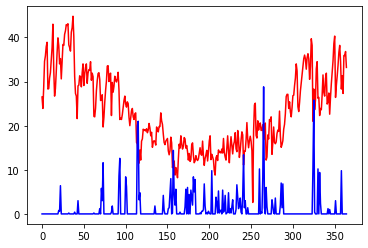

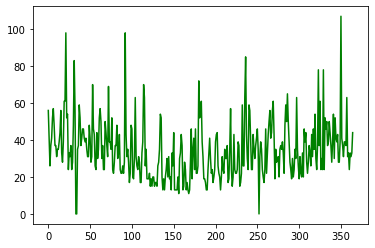

1.3041095890410952
water over 20 days: 4
water over 10 days: 11
water over 0 days: 111


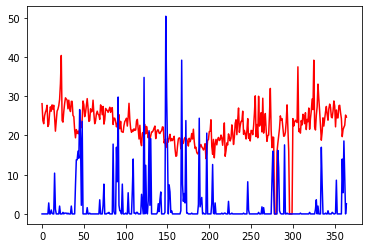

1.3041095890410952
water over 20 days: 11
water over 10 days: 31
water over 0 days: 128
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 10.4, 1.2, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.4, 13.8, 13.8, 16.0, 14.2, 26.6, 19.2, 2.2, 23.6, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6, 0.0, 0.0, 0.0, 2.2, 7.6, 0.0, 0.0, 0.0, 0.2, 0.2, 0.4, 0.0, 0.0, 0.0, 0.0, 17.8, 0.6, 0.0, 0.0, 17.0, 8.2, 29.8, 2.2, 0.8, 0.8, 0.0, 7.6, 0.0, 0.0, 0.0]


In [37]:
# Currently extract the water, wind, temp and rain prediction to perform on the system.

# water: 4, wind: 8, temp: 3, water_predict: 22

def data_format(data):
    system = {}
    Water_v, Wind_v, temp_v, water_predict = [], [], [], []
    for d in data:
        # data format
        if str(d[4]) == 'nan':
            rainfall = 0.0
        else:
            rainfall = d[4]
        if str(d[8]) == 'nan':
            wind = 0.0
        else:
            wind = d[8]
        if str(d[3]) == 'nan' and str(d[2]) == 'nan':
            temp = 0.0
        elif str(d[3]) == 'nan' and str(d[2]) != 'nan':
            temp = d[2]
        else:
            temp = d[3]
        water_p = d[22]
        
        system[d[0]] = [rainfall, wind, temp, water_p]
        Water_v.append(rainfall)
        Wind_v.append(wind)
        temp_v.append(temp)
        water_predict.append(water_p)
    return system, Water_v, Wind_v, temp_v, water_predict

system, Water_v, Wind_v, temp_v, water_predict = data_format(data)
sys2, Water2, Wind2, temp2, water_pre2 = data_format(data2)
    
# print(temp_v)
# print(Water_v)
plt.plot(temp_v[:365], color = 'r', linestyle = '-')
plt.plot([x for x in range(365)], Water_v[:365], color = 'b', linestyle = '-')
plt.show()
plt.plot(Wind_v[:365], color = 'g', linestyle = '-')
plt.show()

avg_water = sum(Water_v[:365]) / 365
print(avg_water)
print('water over 20 days: ' + str(len([x for x in Water_v[:365] if x >= 20])))
print('water over 10 days: ' + str(len([x for x in Water_v[:365] if x >= 10])))
print('water over 0 days: ' + str(len([x for x in Water_v[:365] if x > 0])))

plt.plot(temp2[:365], color = 'r', linestyle = '-')
plt.plot([x for x in range(365)], Water2[:365], color = 'b', linestyle = '-')
plt.show()

avg_water = sum(Water_v[:365]) / 365
print(avg_water)
print('water over 20 days: ' + str(len([x for x in Water2[:365] if x >= 20])))
print('water over 10 days: ' + str(len([x for x in Water2[:365] if x >= 10])))
print('water over 0 days: ' + str(len([x for x in Water2[:365] if x > 0])))
print(Water2[:100])

4. Define the Plants base on the environment

In [28]:
class Plant():
    def __init__(self, id):
        self.id = id
        # threshold: water maximum per day
        # period: the reward return time
        # water: the water required o.w. fail to plant -> reward = -200
        if id == 1:
            # 5 / 3.
            self.name = 'Crop 1'
            self.threshold = 100 # daily water collect can't over this number
            self.period = 14
            self.reward = 20
            self.co_reward = 3
            self.water = 0
            self.curr = 1
            self.temp_threshod = 45
            self.water_collect = 0.0
        elif id == 2:
            # 7.5 / 2.5
            self.name = 'Crop 2'
            self.threshold = 100
            self.period = 21
            self.reward = 50
            self.co_reward = 2
            self.water = 3
            self.curr = 1
            self.temp_threshod = 40
            self.water_collect = 0.0
        elif id == 3:
            # 8 / 4
            self.name = 'Crop 3'
            self.threshold = 100
            self.period = 25
            self.reward = 50
            self.co_reward = 3
            self.water = 10
            self.curr = 1
            self.temp_threshod = 40
            self.water_collect = 0.0
        elif id == 4:
            # 25 / 5
            self.name = 'Crop 4'
            self.threshold = 100
            self.period = 30
            self.reward = 200
            self.co_reward = 2
            self.water = 40
            self.curr = 1
            self.temp_threshod = 35
            self.water_collect = 0.0

5. Define the action list and q values

In [29]:
# find the maximum q values from the q_values list. --helper function for epsilonGreedyAgent
def argmax(q_values):
    
    top_value = float("-inf")
    ties = []
    
    for i in range(len(q_values)):
        # find the maximum q values
        if q_values[i] > top_value:
            top_value = q_values[i]
            ties = [i]
        elif q_values[i] == top_value:
            ties.append(i)
    return np.random.choice(ties)

# Epsilon Greedy to try new actions or argmax value.
def EpsilonGreedyAgent(q_values, epsilon):
    r = np.random.random()
    if r < epsilon:
        current_action = np.random.randint(0, len(q_values))
    else:
        current_action = argmax(q_values)
    return current_action

# Update the Q value list from last action.
def UpdateQvalues(q_values, a_record, last_action, reward):
    a_record[last_action] += 1
    q_values[last_action] = q_values[last_action] + 1 / a_record[last_action] \
    * (reward - q_values[last_action])
    


In [30]:
# define action lists - may have more
# 1: plant crop 1
# 2: plant crop 2
# 3: plant crop 3
# 4: plant crop 4

actions = ['Crop-1', 'Crop-2', 'Crop-3', 'Crop-4']
q_values = [0, 0, 0, 0]
a_record = [0, 0, 0, 0]

In [31]:
def checkMature(farmland, q_values, a_record, epsilon, logs):
    reward = 0
    # print("Check Mature or not")
    for i in range(len(farmland)):
        x = farmland[i]
        # mature now and get reward
        if x.curr == x.period:
            # check water collected
            if x.water_collect < x.water:
                r = x.period * x.co_reward
            else:
                r = x.reward + x.period * x.co_reward
                
            UpdateQvalues(q_values, a_record, x.id - 1, r)
            logs.append(x.name + ', on Farmland ' + str(i) + ' is mature now. Collect rewards of: ' + str(r) + '. Farmland ' + str(i) + \
                            ' is ready for farming.')
            next_i = EpsilonGreedyAgent(q_values, epsilon)
            farmland[i] = Plant(next_i + 1)
            logs.append('The agent select to Plant: ' + farmland[i].name + ', on Farmland ' + str(i) + '.')
            
            reward += r
    return reward

In [32]:
def action_flow(farmland, a_record, q_values, rain, temp, epsilon, dmg, logs):
    reward = 0
    # check mature or not
    logs.append('--------------Mature Check--------------')
    reward += checkMature(farmland, q_values, a_record, epsilon, logs)
    logs.append('--------------Mature Check Done--------------')
    # check farming full
    # farming(farmland, q_values, epsilon)
    
   # UIupdate()

    reward += end_day_checking(farmland, rain, temp, q_values, a_record, epsilon, dmg, logs)
    
    return reward
    
def farming(farmland, q_values, e):
    # return the id of the crops to plant
    ret = []
    while (len(farmland) < 3):
        r = EpsilonGreedyAgent(q_values, e)
        print("The agent select the plant " + str(r + 1))
        ret.append(r + 1)
        farmland.append(Plant(r + 1))
    return ret
        
def end_day_checking(farmland, rain, temp, q_values, a_record, e, dmg, logs):
    reward = 0
    for i in range(len(farmland)):
        x = farmland[i]
        if rain > x.threshold or temp > x.temp_threshod:
            reward = -200
            logs.append('--------------!!!--------------')
            dmg[x.id - 1] += 1
            if rain > x.threshold:
                logs.append(x.name + ', on Farmland ' + str(i) + ' get damaged by over rainfall. Rewards: -100. Farmland ' + str(i) + \
                            ' is ready for farming.')
            else:
                logs.append(x.name + ', on Farmland ' + str(i) + ' get damaged by over temperature. Rewards: -100. Farmland ' + str(i) + \
                            ' is ready for farming.')
            UpdateQvalues(q_values, a_record, x.id - 1, reward)
            next_i = EpsilonGreedyAgent(q_values, e)
            farmland[i] = Plant(next_i + 1)
            logs.append('The agent select to Plant: ' + farmland[i].name + ', on Farmland ' + str(i) + '.')
            
        else:
            x.curr += 1
            x.water_collect += rain
    return reward
            

In [33]:
def Graph(loc, e, water, temp, a1, a2, a3, a4, reward, tot_t):
    plt.title(loc + ' with ' + str(e))
    plt.plot(temp, color = 'r', linestyle = '-')
    plt.plot(water, color = 'b', linestyle = '-')
    plt.figure(figsize=(10,10))
    plt.show()
    plt.title(loc + ' with ' + str(e) + ' epsilon ')
    plt.plot(a1, color = 'c', linestyle = '-', label='crop 1')
    plt.plot(a2, color = 'g', linestyle = '-', label='crop 2')
    plt.plot(a3, color = 'y', linestyle = '-', label='crop 3')
    plt.plot(a4, color = 'm', linestyle = '-', label='crop 4')
    plt.figure(figsize=(10,10))
    plt.show()
    plt.title(loc + ' with ' + str(e) + ' rewards ')
    plt.plot(reward, color = 'k', linestyle = '-')
    plt.plot(tot_t, color = 'r', linestyle = '-')
    plt.figure(figsize=(10,10))
    plt.show()

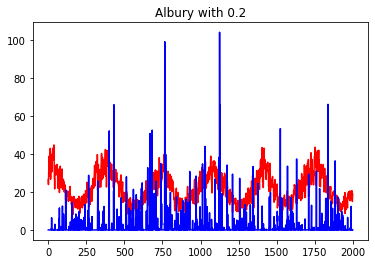

<Figure size 720x720 with 0 Axes>

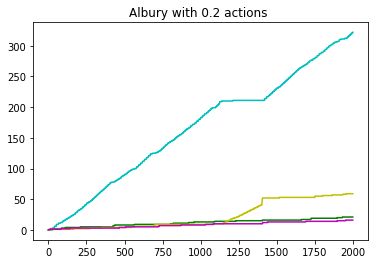

<Figure size 720x720 with 0 Axes>

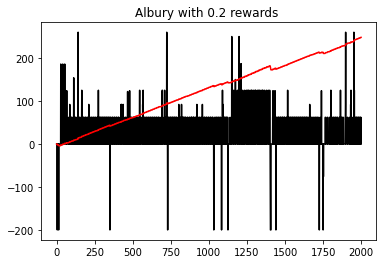

<Figure size 720x720 with 0 Axes>

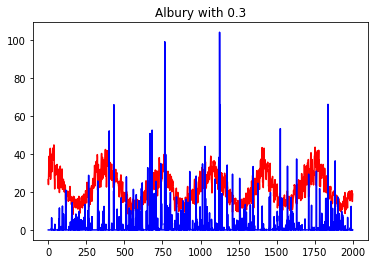

<Figure size 720x720 with 0 Axes>

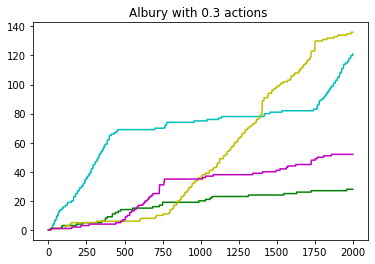

<Figure size 720x720 with 0 Axes>

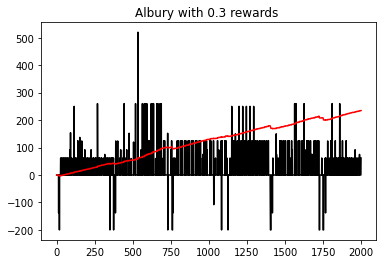

<Figure size 720x720 with 0 Axes>

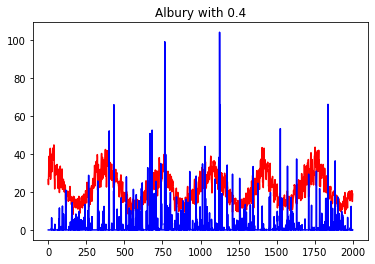

<Figure size 720x720 with 0 Axes>

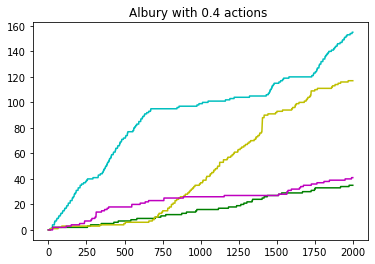

<Figure size 720x720 with 0 Axes>

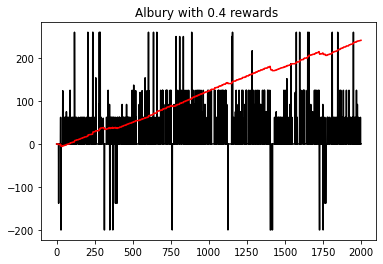

<Figure size 720x720 with 0 Axes>

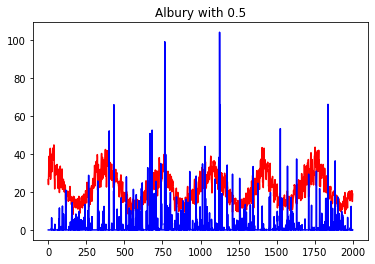

<Figure size 720x720 with 0 Axes>

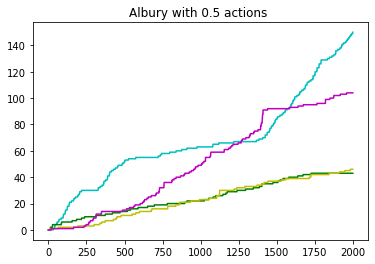

<Figure size 720x720 with 0 Axes>

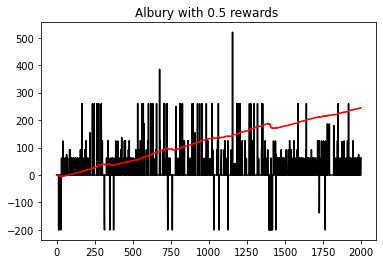

<Figure size 720x720 with 0 Axes>

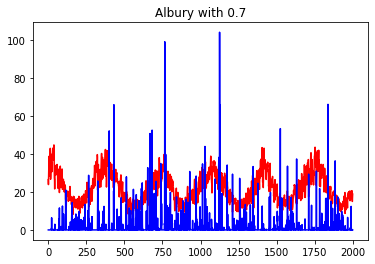

<Figure size 720x720 with 0 Axes>

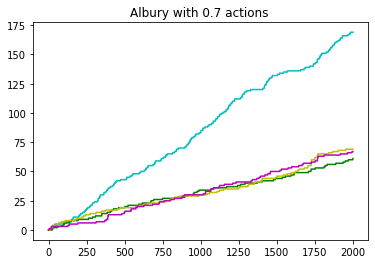

<Figure size 720x720 with 0 Axes>

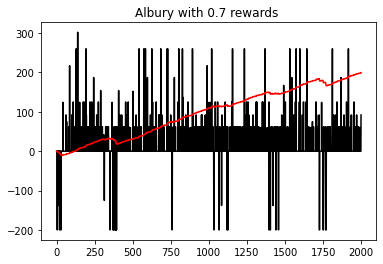

<Figure size 720x720 with 0 Axes>

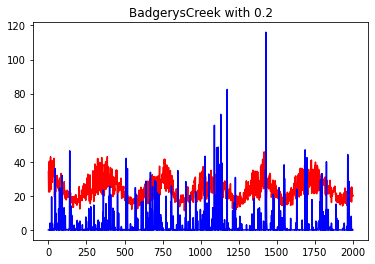

<Figure size 720x720 with 0 Axes>

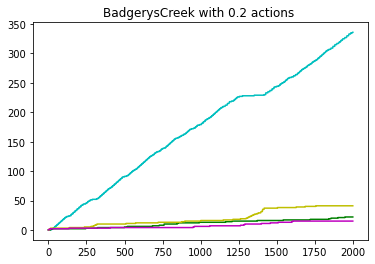

<Figure size 720x720 with 0 Axes>

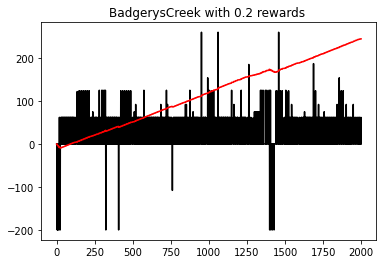

<Figure size 720x720 with 0 Axes>

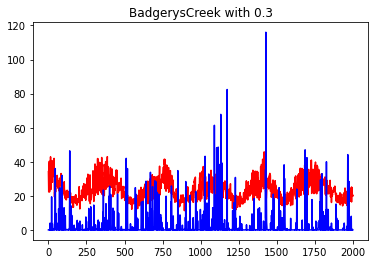

<Figure size 720x720 with 0 Axes>

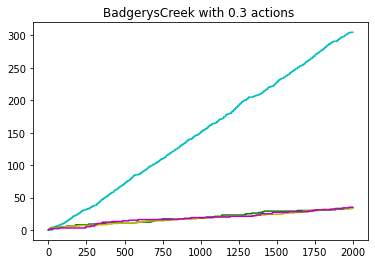

<Figure size 720x720 with 0 Axes>

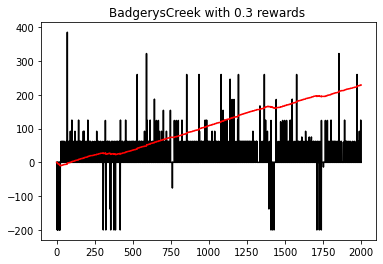

<Figure size 720x720 with 0 Axes>

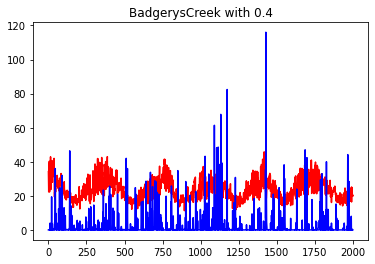

<Figure size 720x720 with 0 Axes>

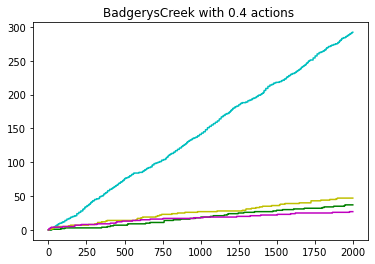

<Figure size 720x720 with 0 Axes>

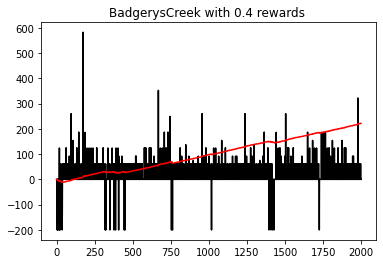

<Figure size 720x720 with 0 Axes>

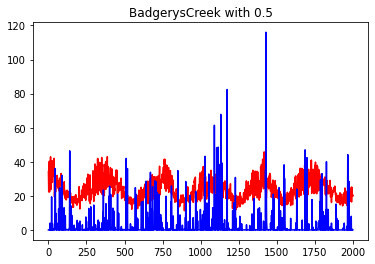

<Figure size 720x720 with 0 Axes>

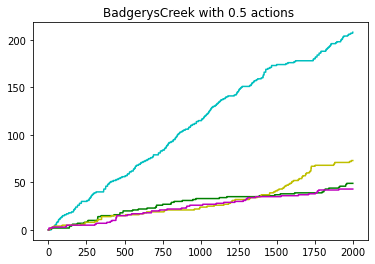

<Figure size 720x720 with 0 Axes>

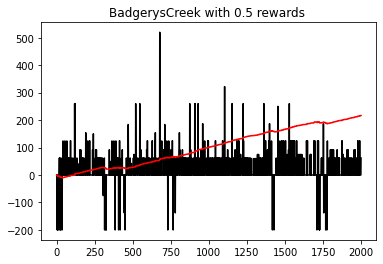

<Figure size 720x720 with 0 Axes>

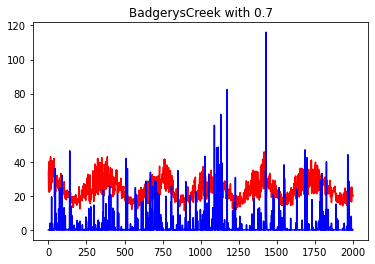

<Figure size 720x720 with 0 Axes>

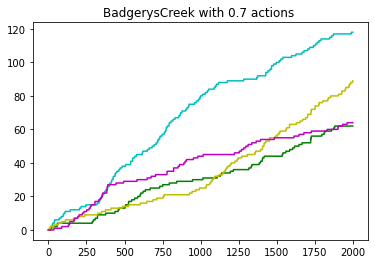

<Figure size 720x720 with 0 Axes>

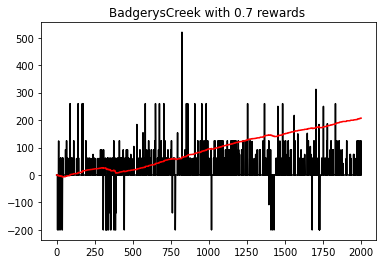

<Figure size 720x720 with 0 Axes>

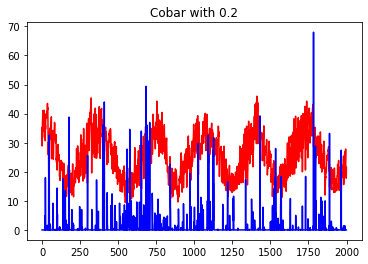

<Figure size 720x720 with 0 Axes>

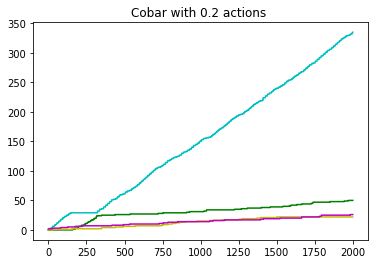

<Figure size 720x720 with 0 Axes>

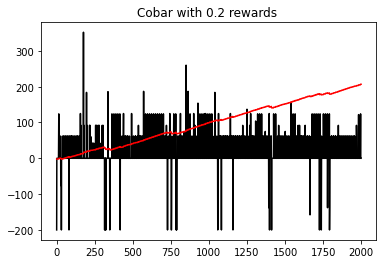

<Figure size 720x720 with 0 Axes>

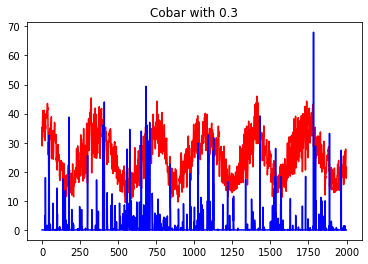

<Figure size 720x720 with 0 Axes>

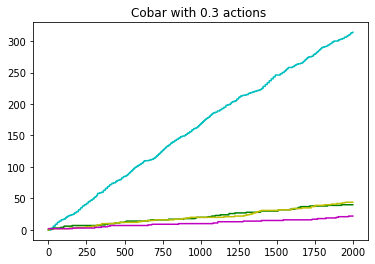

<Figure size 720x720 with 0 Axes>

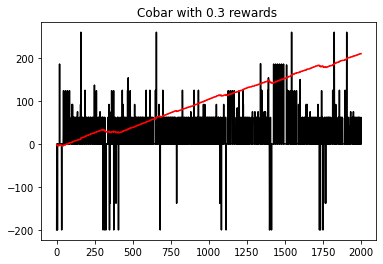

<Figure size 720x720 with 0 Axes>

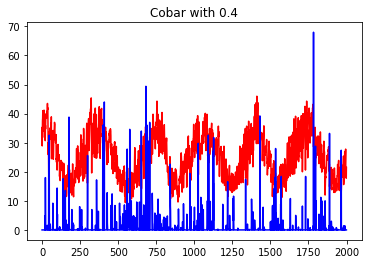

<Figure size 720x720 with 0 Axes>

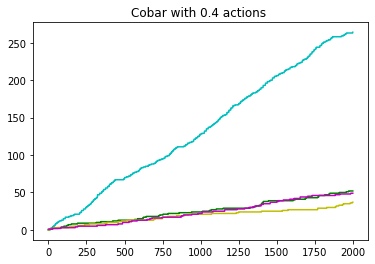

<Figure size 720x720 with 0 Axes>

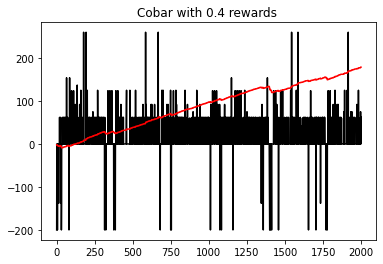

<Figure size 720x720 with 0 Axes>

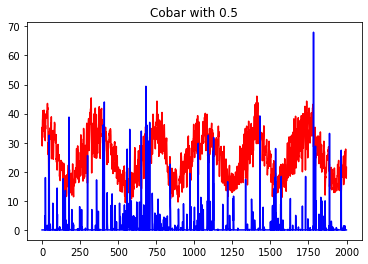

<Figure size 720x720 with 0 Axes>

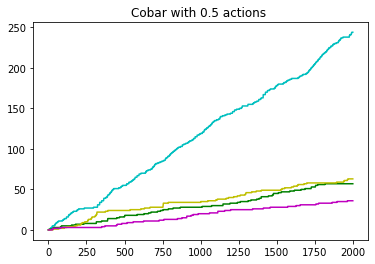

<Figure size 720x720 with 0 Axes>

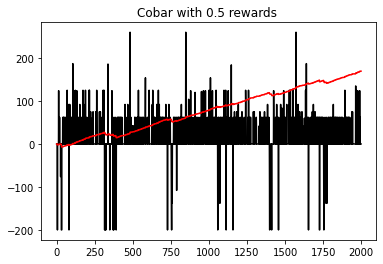

<Figure size 720x720 with 0 Axes>

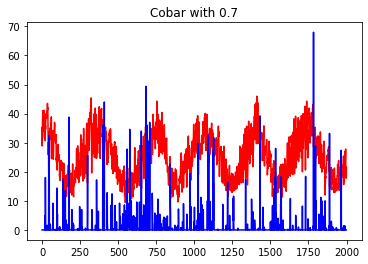

<Figure size 720x720 with 0 Axes>

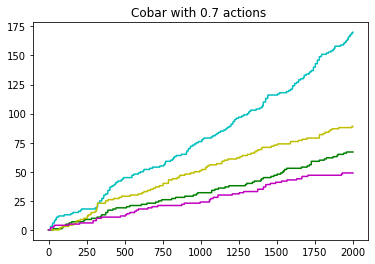

<Figure size 720x720 with 0 Axes>

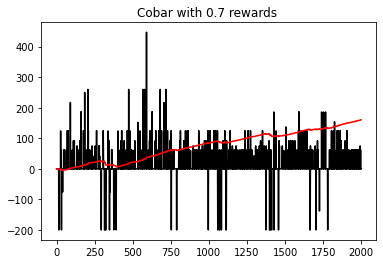

<Figure size 720x720 with 0 Axes>

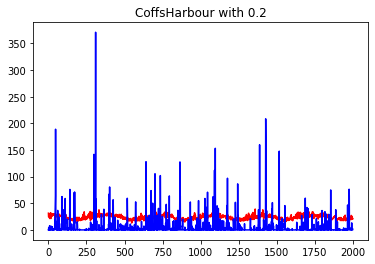

<Figure size 720x720 with 0 Axes>

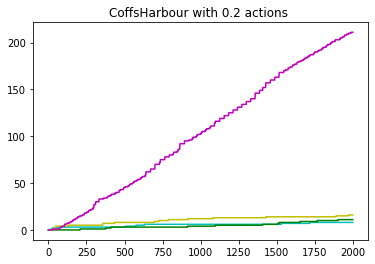

<Figure size 720x720 with 0 Axes>

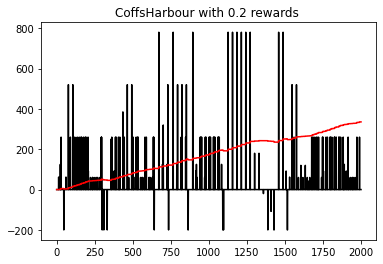

<Figure size 720x720 with 0 Axes>

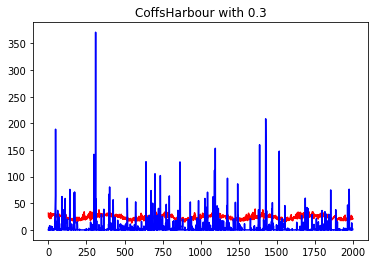

<Figure size 720x720 with 0 Axes>

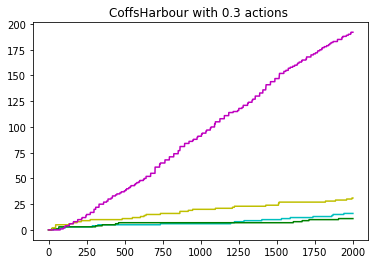

<Figure size 720x720 with 0 Axes>

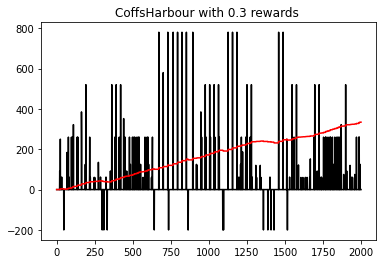

<Figure size 720x720 with 0 Axes>

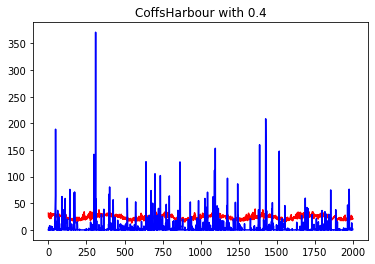

<Figure size 720x720 with 0 Axes>

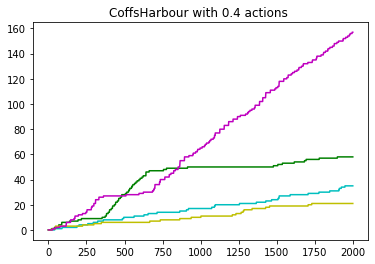

<Figure size 720x720 with 0 Axes>

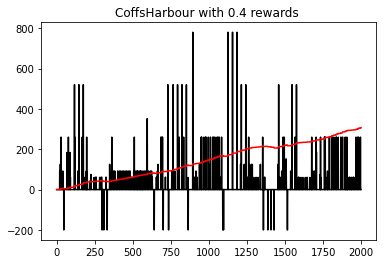

<Figure size 720x720 with 0 Axes>

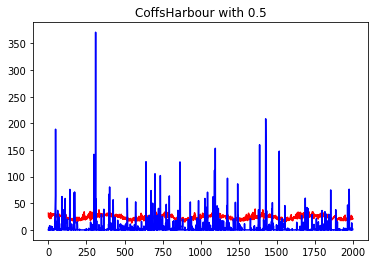

<Figure size 720x720 with 0 Axes>

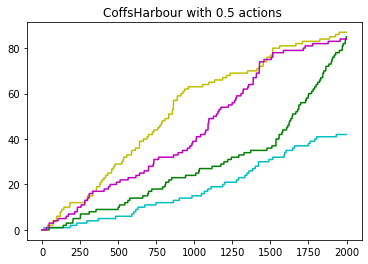

<Figure size 720x720 with 0 Axes>

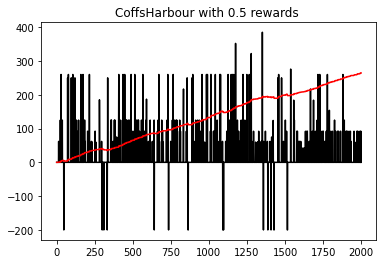

<Figure size 720x720 with 0 Axes>

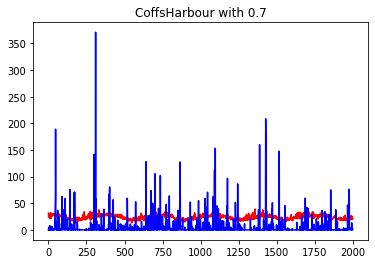

<Figure size 720x720 with 0 Axes>

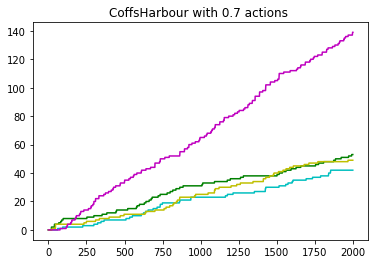

<Figure size 720x720 with 0 Axes>

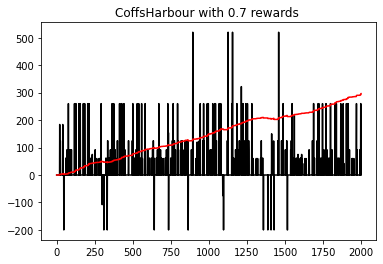

<Figure size 720x720 with 0 Axes>

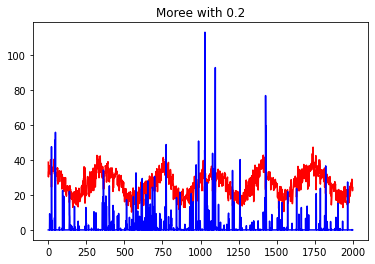

<Figure size 720x720 with 0 Axes>

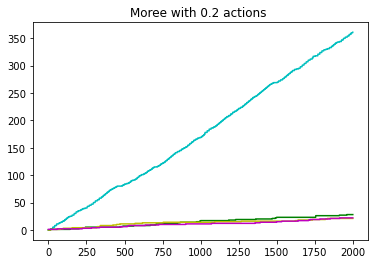

<Figure size 720x720 with 0 Axes>

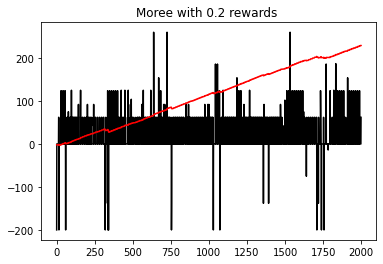

<Figure size 720x720 with 0 Axes>

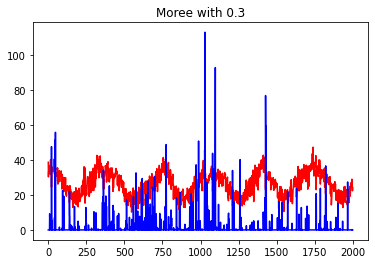

<Figure size 720x720 with 0 Axes>

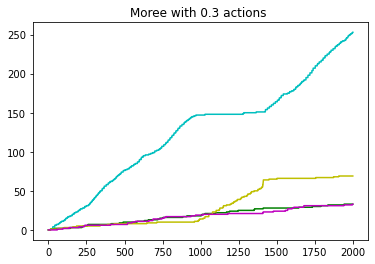

<Figure size 720x720 with 0 Axes>

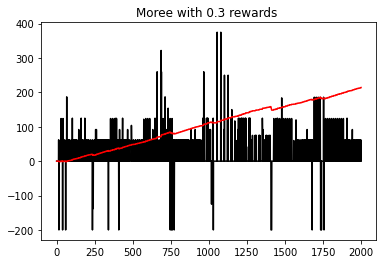

<Figure size 720x720 with 0 Axes>

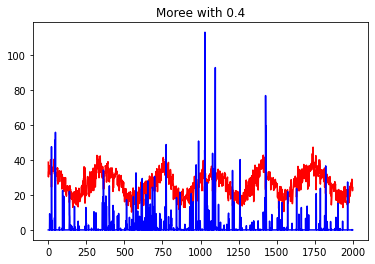

<Figure size 720x720 with 0 Axes>

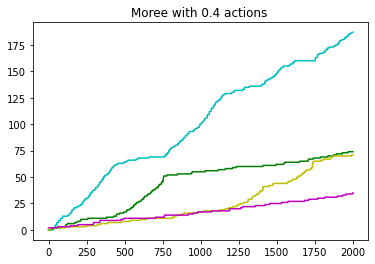

<Figure size 720x720 with 0 Axes>

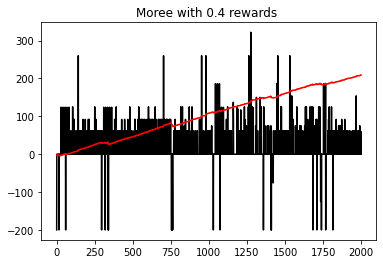

<Figure size 720x720 with 0 Axes>

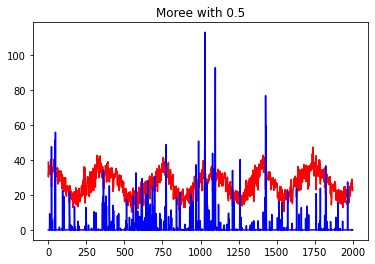

<Figure size 720x720 with 0 Axes>

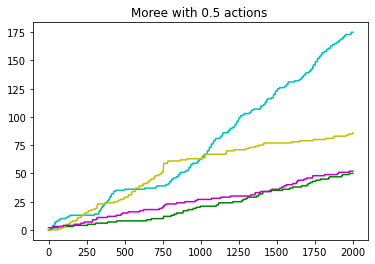

<Figure size 720x720 with 0 Axes>

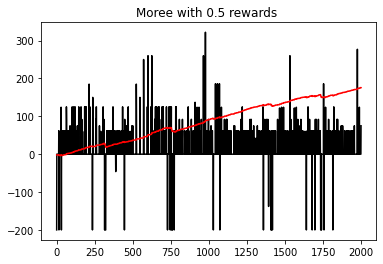

<Figure size 720x720 with 0 Axes>

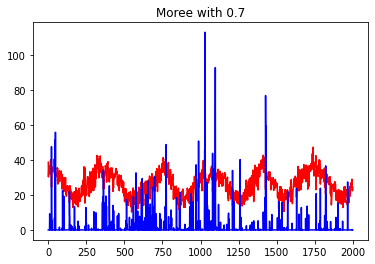

<Figure size 720x720 with 0 Axes>

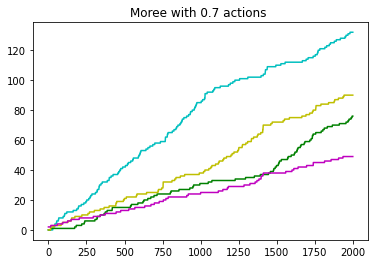

<Figure size 720x720 with 0 Axes>

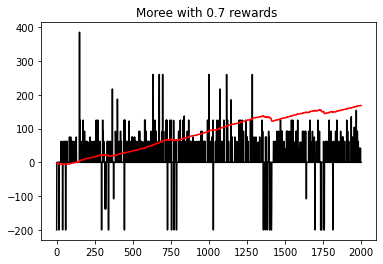

<Figure size 720x720 with 0 Axes>

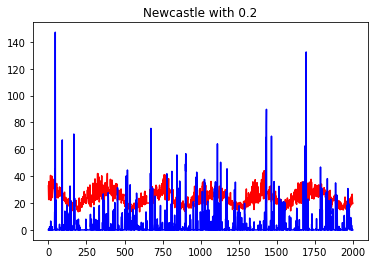

<Figure size 720x720 with 0 Axes>

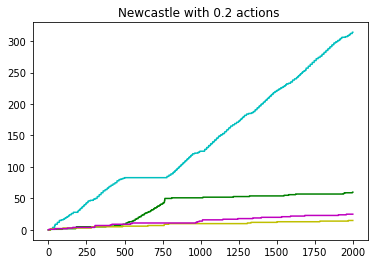

<Figure size 720x720 with 0 Axes>

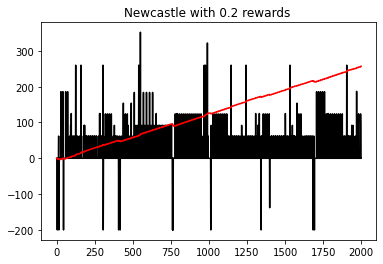

<Figure size 720x720 with 0 Axes>

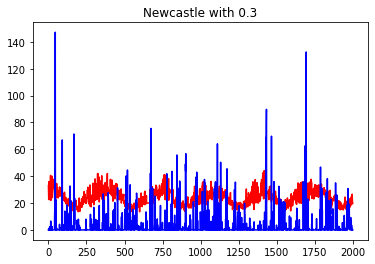

<Figure size 720x720 with 0 Axes>

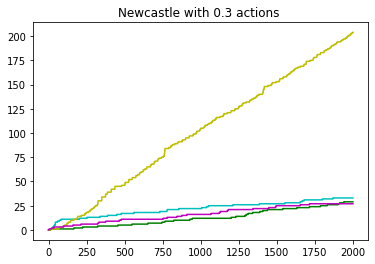

<Figure size 720x720 with 0 Axes>

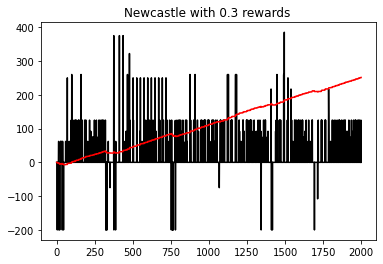

<Figure size 720x720 with 0 Axes>

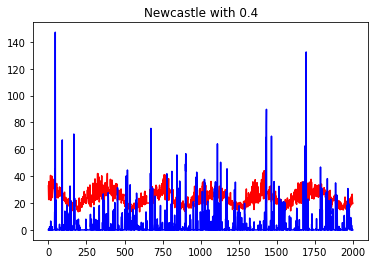

<Figure size 720x720 with 0 Axes>

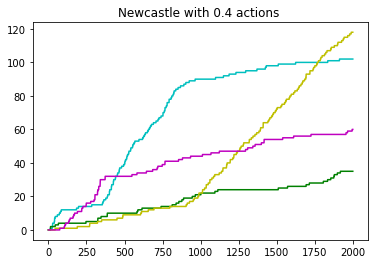

<Figure size 720x720 with 0 Axes>

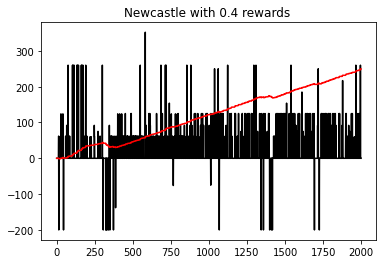

<Figure size 720x720 with 0 Axes>

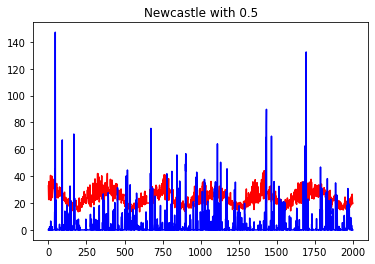

<Figure size 720x720 with 0 Axes>

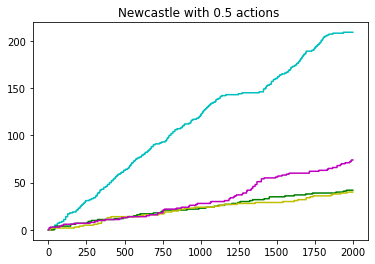

<Figure size 720x720 with 0 Axes>

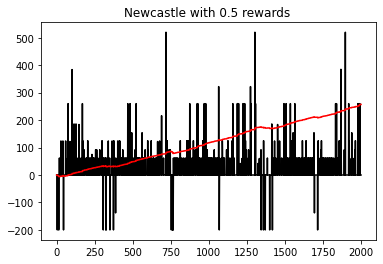

<Figure size 720x720 with 0 Axes>

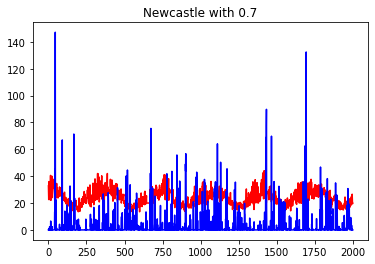

<Figure size 720x720 with 0 Axes>

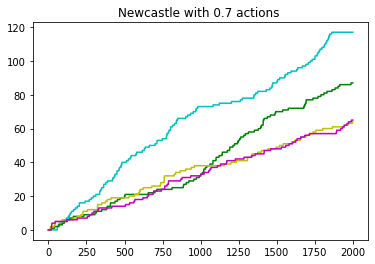

<Figure size 720x720 with 0 Axes>

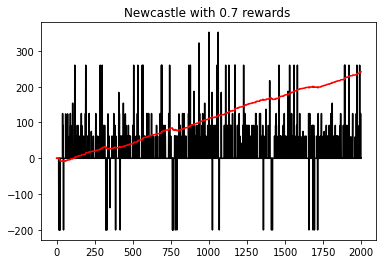

<Figure size 720x720 with 0 Axes>

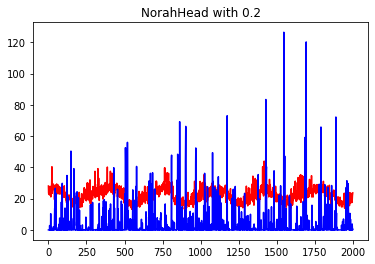

<Figure size 720x720 with 0 Axes>

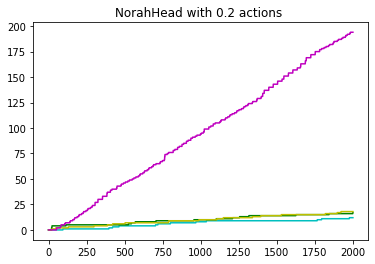

<Figure size 720x720 with 0 Axes>

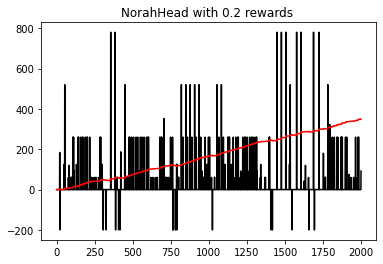

<Figure size 720x720 with 0 Axes>

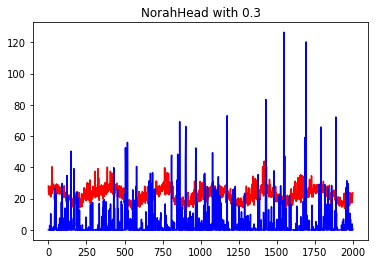

<Figure size 720x720 with 0 Axes>

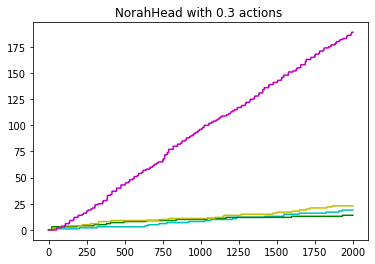

<Figure size 720x720 with 0 Axes>

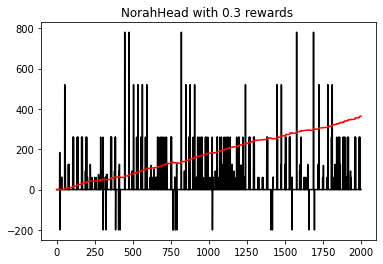

<Figure size 720x720 with 0 Axes>

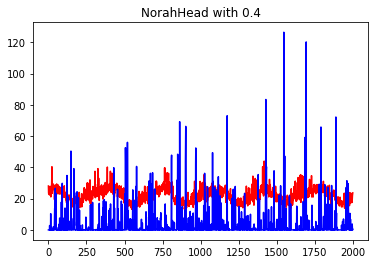

<Figure size 720x720 with 0 Axes>

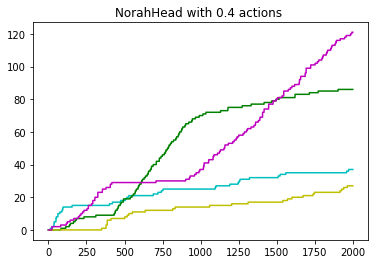

<Figure size 720x720 with 0 Axes>

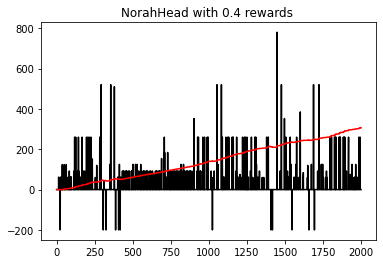

<Figure size 720x720 with 0 Axes>

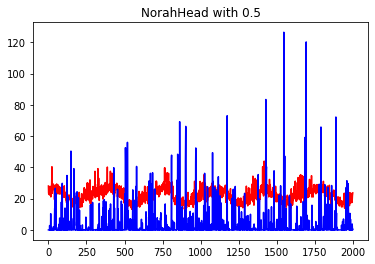

<Figure size 720x720 with 0 Axes>

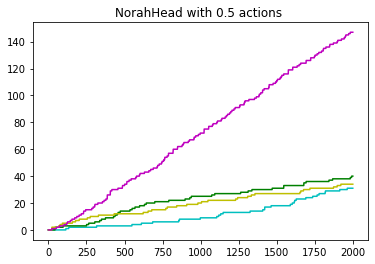

<Figure size 720x720 with 0 Axes>

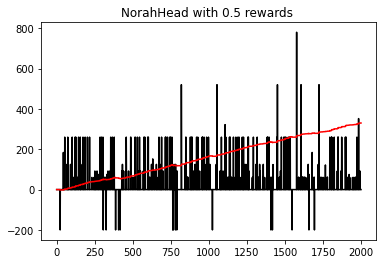

<Figure size 720x720 with 0 Axes>

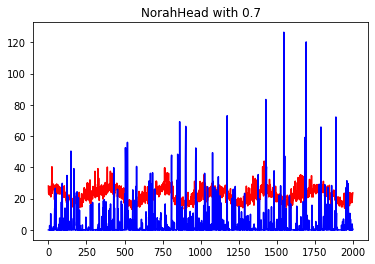

<Figure size 720x720 with 0 Axes>

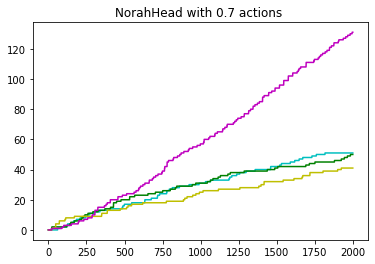

<Figure size 720x720 with 0 Axes>

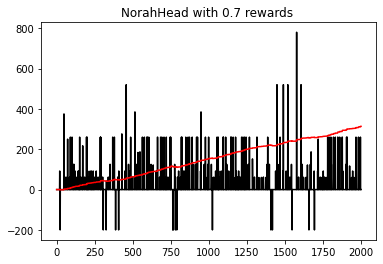

<Figure size 720x720 with 0 Axes>

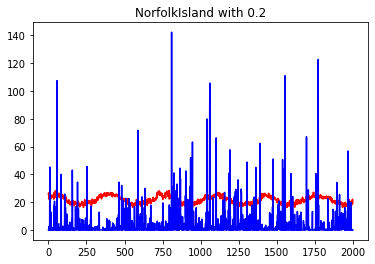

<Figure size 720x720 with 0 Axes>

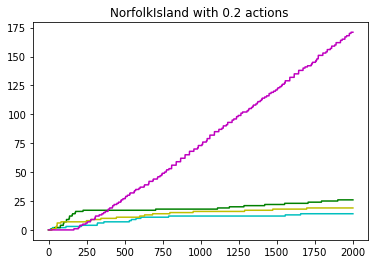

<Figure size 720x720 with 0 Axes>

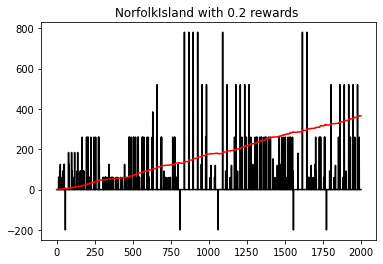

<Figure size 720x720 with 0 Axes>

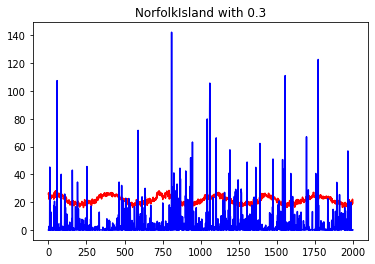

<Figure size 720x720 with 0 Axes>

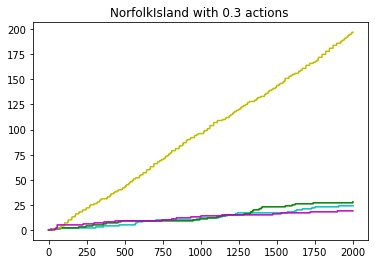

<Figure size 720x720 with 0 Axes>

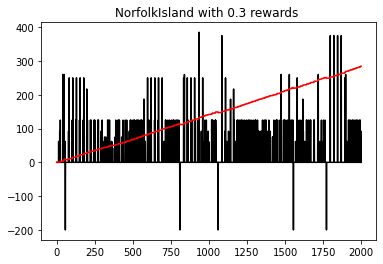

<Figure size 720x720 with 0 Axes>

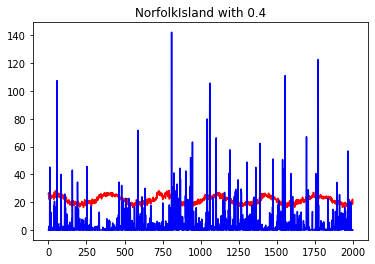

<Figure size 720x720 with 0 Axes>

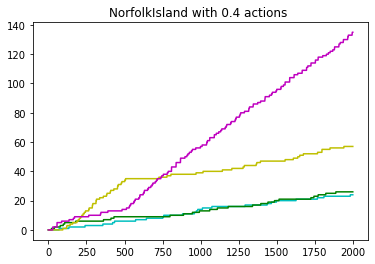

<Figure size 720x720 with 0 Axes>

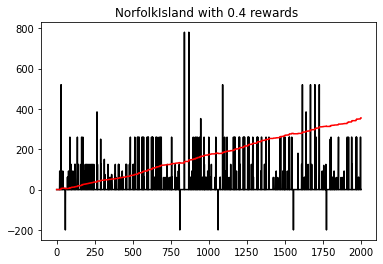

<Figure size 720x720 with 0 Axes>

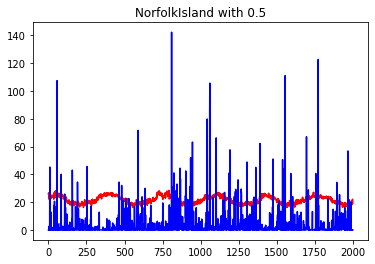

<Figure size 720x720 with 0 Axes>

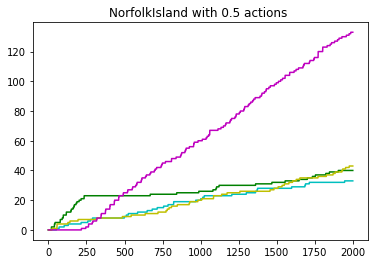

<Figure size 720x720 with 0 Axes>

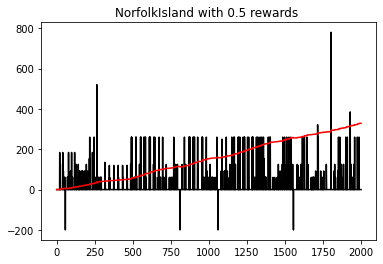

<Figure size 720x720 with 0 Axes>

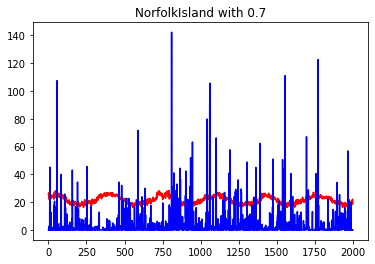

<Figure size 720x720 with 0 Axes>

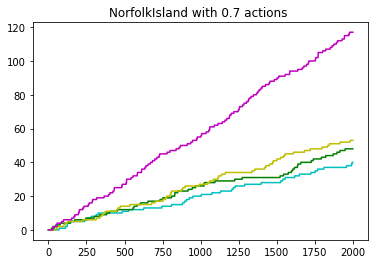

<Figure size 720x720 with 0 Axes>

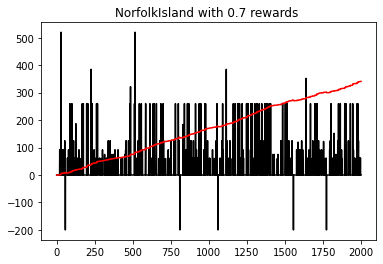

<Figure size 720x720 with 0 Axes>

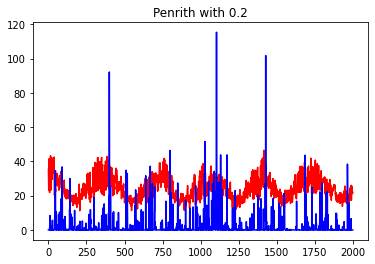

<Figure size 720x720 with 0 Axes>

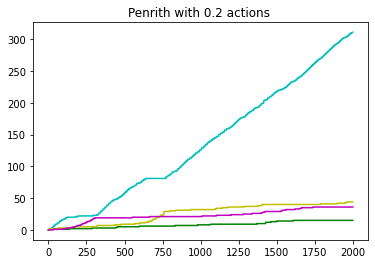

<Figure size 720x720 with 0 Axes>

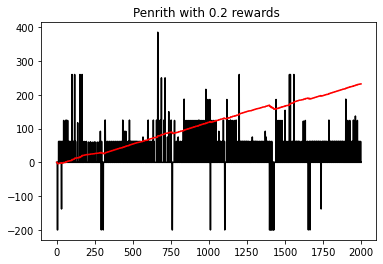

<Figure size 720x720 with 0 Axes>

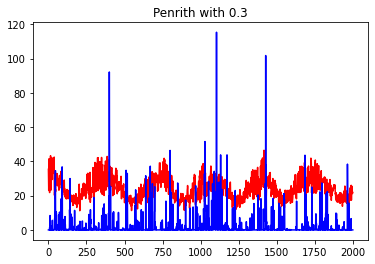

<Figure size 720x720 with 0 Axes>

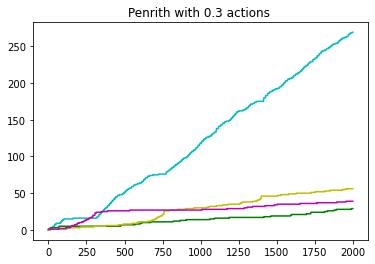

<Figure size 720x720 with 0 Axes>

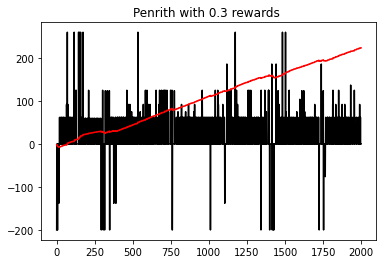

<Figure size 720x720 with 0 Axes>

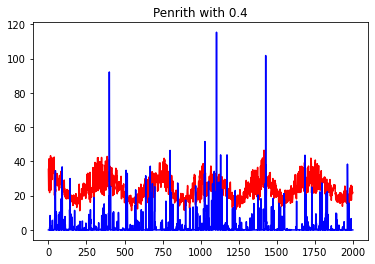

<Figure size 720x720 with 0 Axes>

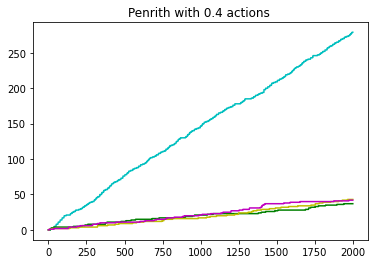

<Figure size 720x720 with 0 Axes>

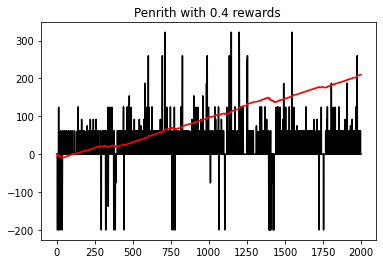

<Figure size 720x720 with 0 Axes>

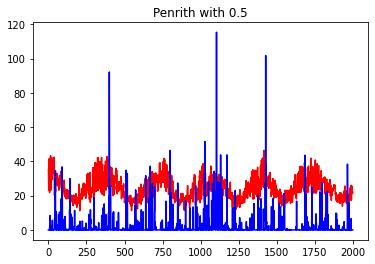

<Figure size 720x720 with 0 Axes>

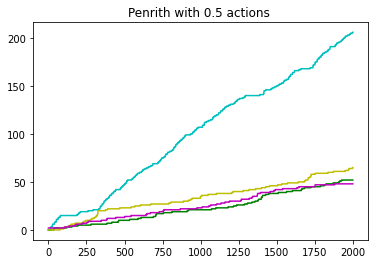

<Figure size 720x720 with 0 Axes>

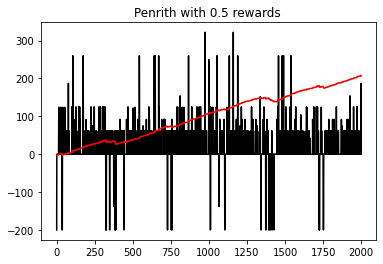

<Figure size 720x720 with 0 Axes>

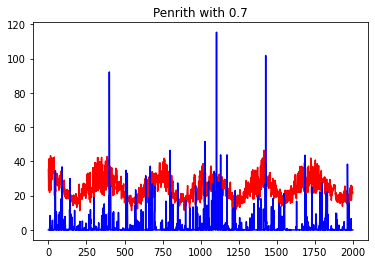

<Figure size 720x720 with 0 Axes>

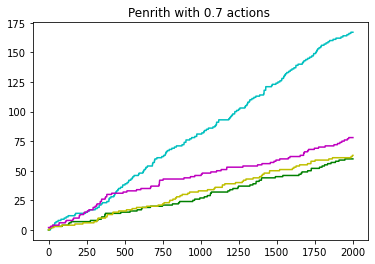

<Figure size 720x720 with 0 Axes>

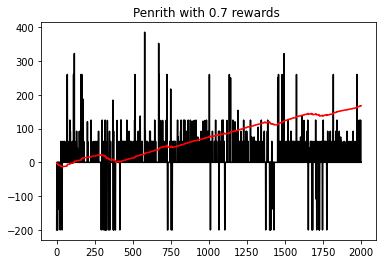

<Figure size 720x720 with 0 Axes>

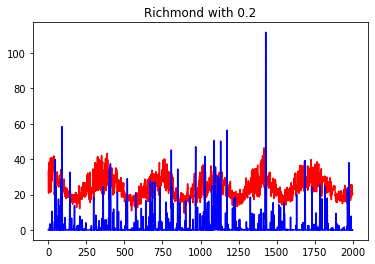

<Figure size 720x720 with 0 Axes>

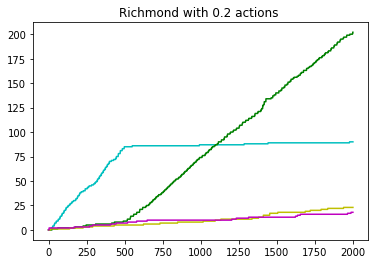

<Figure size 720x720 with 0 Axes>

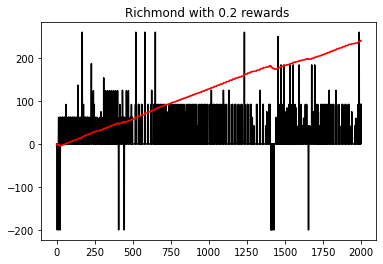

<Figure size 720x720 with 0 Axes>

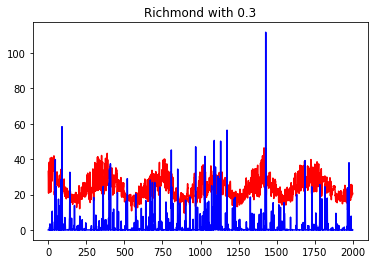

<Figure size 720x720 with 0 Axes>

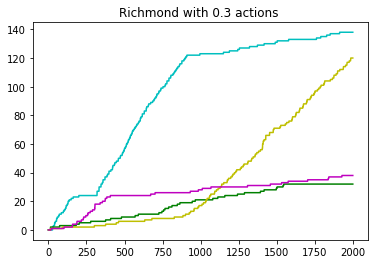

<Figure size 720x720 with 0 Axes>

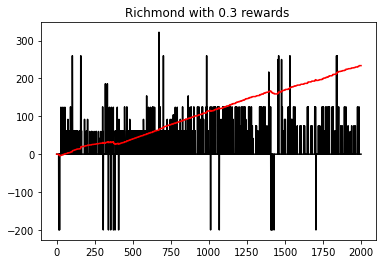

<Figure size 720x720 with 0 Axes>

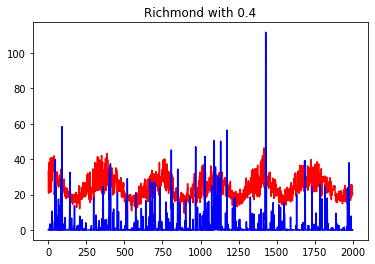

<Figure size 720x720 with 0 Axes>

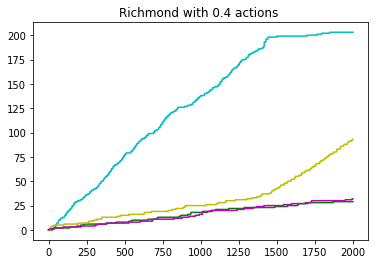

<Figure size 720x720 with 0 Axes>

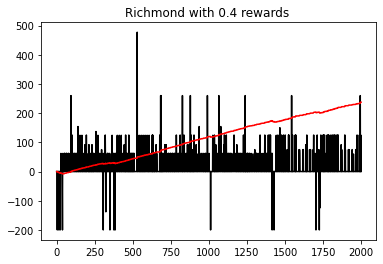

<Figure size 720x720 with 0 Axes>

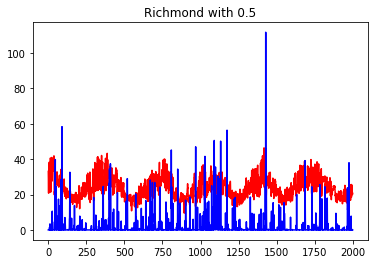

<Figure size 720x720 with 0 Axes>

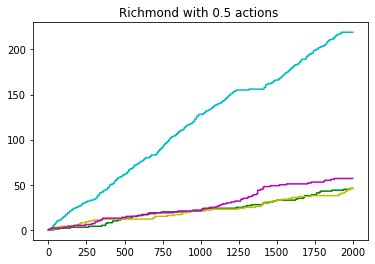

<Figure size 720x720 with 0 Axes>

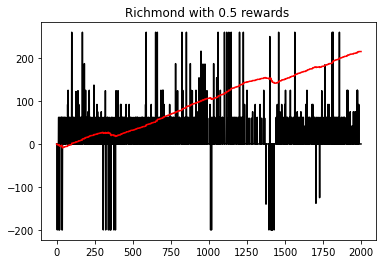

<Figure size 720x720 with 0 Axes>

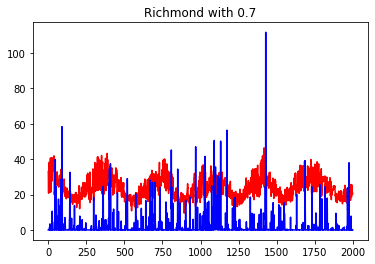

<Figure size 720x720 with 0 Axes>

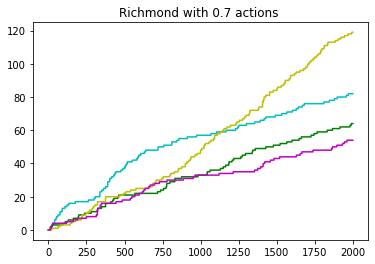

<Figure size 720x720 with 0 Axes>

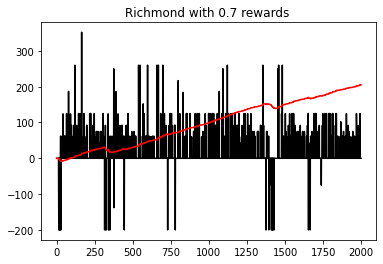

<Figure size 720x720 with 0 Axes>

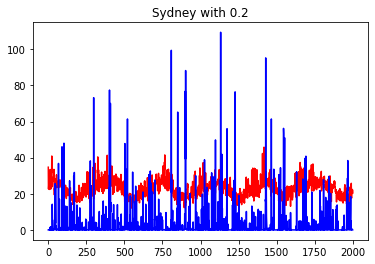

<Figure size 720x720 with 0 Axes>

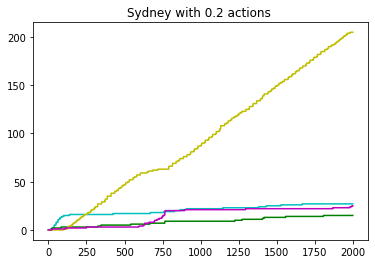

<Figure size 720x720 with 0 Axes>

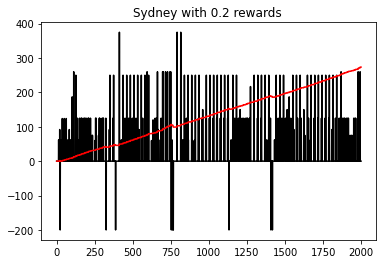

<Figure size 720x720 with 0 Axes>

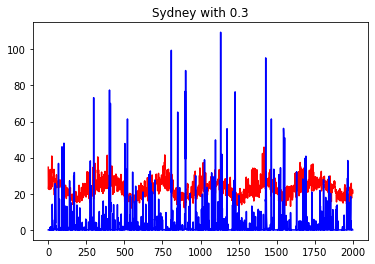

<Figure size 720x720 with 0 Axes>

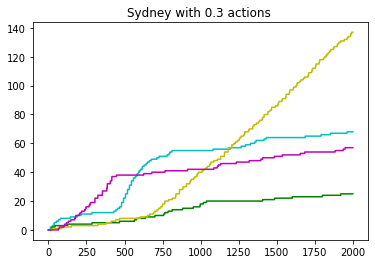

<Figure size 720x720 with 0 Axes>

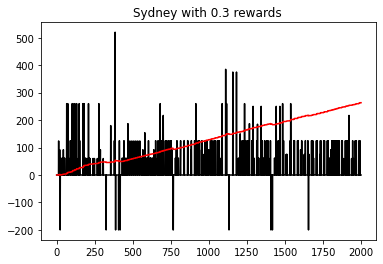

<Figure size 720x720 with 0 Axes>

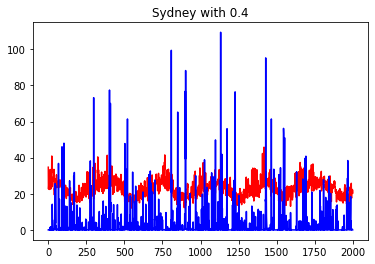

<Figure size 720x720 with 0 Axes>

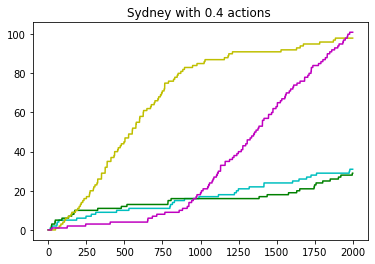

<Figure size 720x720 with 0 Axes>

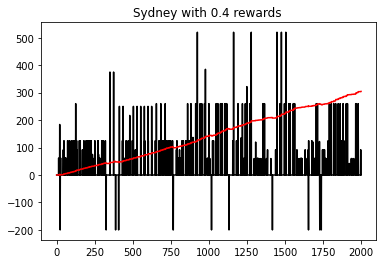

<Figure size 720x720 with 0 Axes>

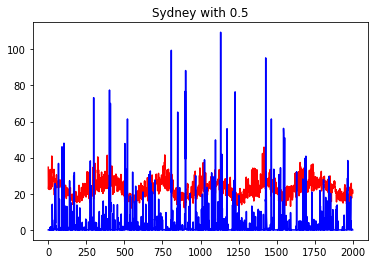

<Figure size 720x720 with 0 Axes>

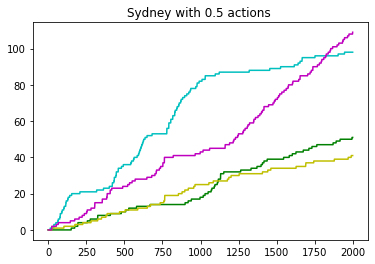

<Figure size 720x720 with 0 Axes>

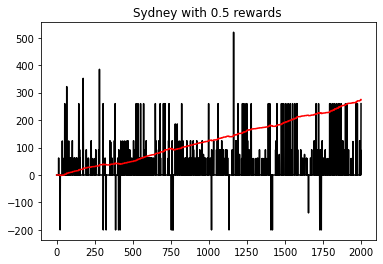

<Figure size 720x720 with 0 Axes>

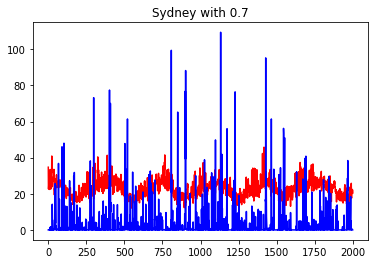

<Figure size 720x720 with 0 Axes>

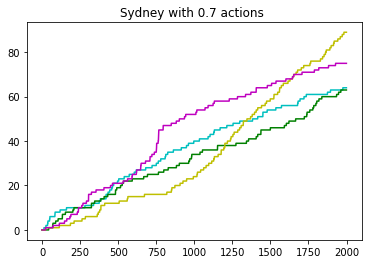

<Figure size 720x720 with 0 Axes>

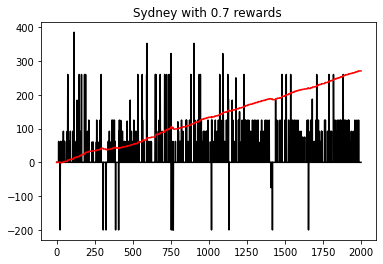

<Figure size 720x720 with 0 Axes>

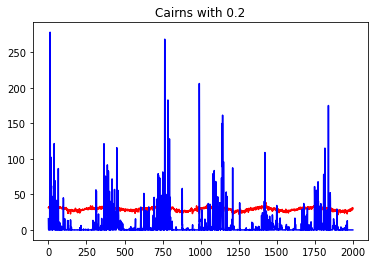

<Figure size 720x720 with 0 Axes>

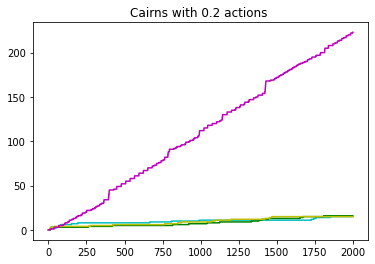

<Figure size 720x720 with 0 Axes>

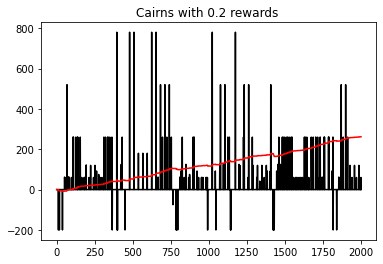

<Figure size 720x720 with 0 Axes>

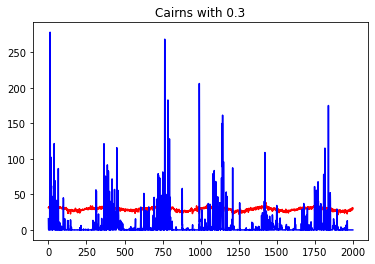

<Figure size 720x720 with 0 Axes>

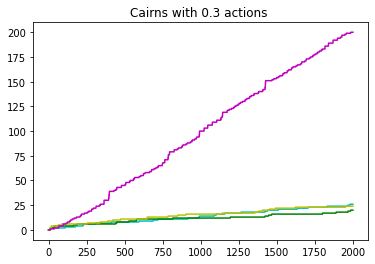

<Figure size 720x720 with 0 Axes>

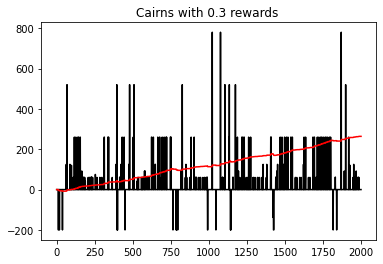

<Figure size 720x720 with 0 Axes>

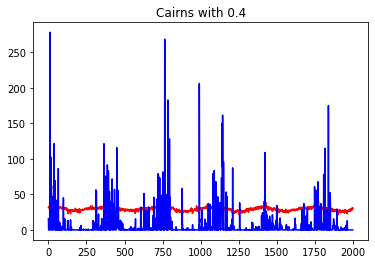

<Figure size 720x720 with 0 Axes>

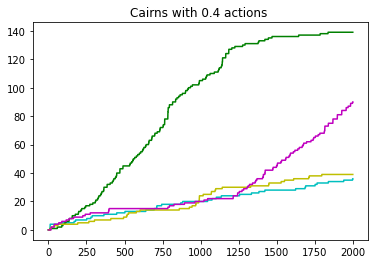

<Figure size 720x720 with 0 Axes>

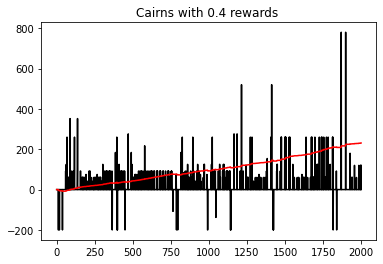

<Figure size 720x720 with 0 Axes>

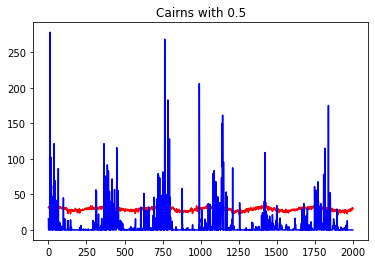

<Figure size 720x720 with 0 Axes>

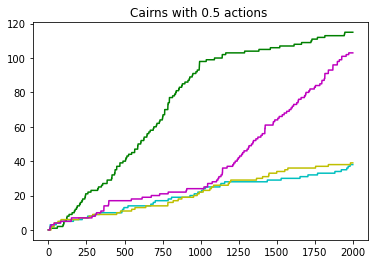

<Figure size 720x720 with 0 Axes>

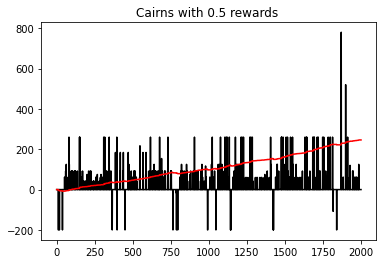

<Figure size 720x720 with 0 Axes>

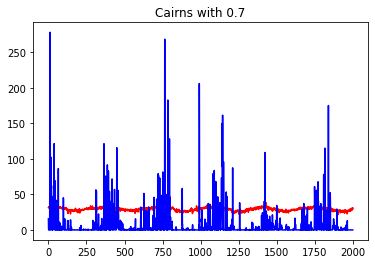

<Figure size 720x720 with 0 Axes>

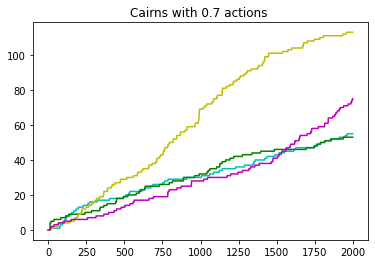

<Figure size 720x720 with 0 Axes>

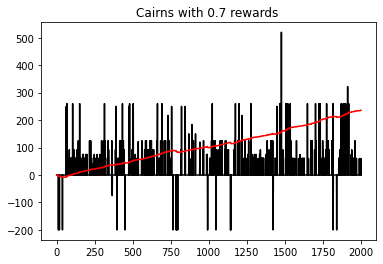

<Figure size 720x720 with 0 Axes>

In [34]:
import os
import csv

actions = ['plant-1', 'plant-2', 'plant-3', 'plant-4']
locations = ['Albury']
epsilon = [0.2, 0.3, 0.4, 0.5, 0.7]
locations = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'Cairns']

records = []

fcsv = open('results.csv','w',encoding='utf-8')
csv_writer = csv.writer(fcsv)
csv_writer.writerow(['Location', 'Epsilon', 'Rewards', 'Q values', 'Actions', 'Error Hit'])

for location in locations:
    for e in epsilon:
        filename = location + '_report_with_' + str(e) + '.txt'
        f = open(filename, 'w')
        f.write('This is a simulation for location: ' + location + '.\n\n')
        
        # for graphing use
        rewards = []
        tot_rewards = []
        tot_reward = 0
        action_graph = [[0] for i in range(4)]
        Water = []
        Temp = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
        
        
        data = environment_select_and_setup(data_collection, '2009-01-01', 2000, location)
        f.write('------------------------------------------------------------------------------------------------\n')

        q_values = [0, 0, 0, 0]
        a_record = [0, 0, 0, 0]
        
        farmland = []
        dmg = [0, 0, 0, 0]
        
        
        
        for i in range(len(data)):
            date = data[i][0]
            f.write("----------------------------- Date: " + date + " ------------------------------\n")
            
            rain, temp = data[i][4], data[i][3]
            
            if str(rain) == 'nan':
                rain = 0.0
                
            if str(temp) == 'nan':
                temp = pre_temp
                #temp = date[i - 1][3]
            
            logs = []
            
            logs.append('Weather ------------- Rain: ' + str(rain) + ' , Temp: ' + str(temp))
            
            # first day plant crops
            if i == 0:
                for i in range(3):
                    r = EpsilonGreedyAgent(q_values, e)
                    farmland.append(Plant(r + 1))
                    logs.append('The agent select to Plant: ' + farmland[i].name + ', on Farmland ' + str(i) + '.')
            
            
            reward = action_flow(farmland, a_record, q_values, rain, temp, e, dmg, logs)
            
            # end of date output
            
            for i in range(len(farmland)):
                logs.append('Farmland ' + str(i) + ' -> ' + farmland[i].name)
            
            logs.append('Q values: ' + str(q_values))
            
            rewards.append(reward)
                
            for log in logs:
                f.write(log + '\n')
            f.write('\n')
            
            pre_temp = temp
            
            tot_reward += reward
            tot_rewards.append(tot_reward / 100)
            
            Water.append(rain)
            Temp.append(temp)
            a1.append(a_record[0])
            a2.append(a_record[1])
            a3.append(a_record[2])
            a4.append(a_record[3])
            
        
        f.write("----------------------------- Summary ------------------------------\n")
        
        f.write("Total Rewards of " + str(sum(rewards)) + '.\n')
        q_str = str(q_values)
        a_str = str(a_record)
        f.write("Total actions hits: " + a_str + '.\n')
        f.write("Agent pref: " + q_str + '.\n')
        
        csv_writer.writerow([location, str(e), str(sum(rewards)), q_str, a_str])
        
        Graph(location, e, Water, Temp, a1, a2, a3, a4, rewards, tot_rewards)
        
        f.close()

fcsv.close()